In [2]:
pip install torchvision


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.2/1.2 MB 4.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [5]:
trainset = datasets.MNIST('TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2763031.72it/s]


Extracting TRAINSET\MNIST\raw\train-images-idx3-ubyte.gz to TRAINSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 131843.78it/s]


Extracting TRAINSET\MNIST\raw\train-labels-idx1-ubyte.gz to TRAINSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 849482.86it/s] 


Extracting TRAINSET\MNIST\raw\t10k-images-idx3-ubyte.gz to TRAINSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting TRAINSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to TRAINSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2233420.45it/s]


Extracting TESTSET\MNIST\raw\train-images-idx3-ubyte.gz to TESTSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 136015.06it/s]


Extracting TESTSET\MNIST\raw\train-labels-idx1-ubyte.gz to TESTSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1132267.01it/s]


Extracting TESTSET\MNIST\raw\t10k-images-idx3-ubyte.gz to TESTSET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting TESTSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to TESTSET\MNIST\raw



In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


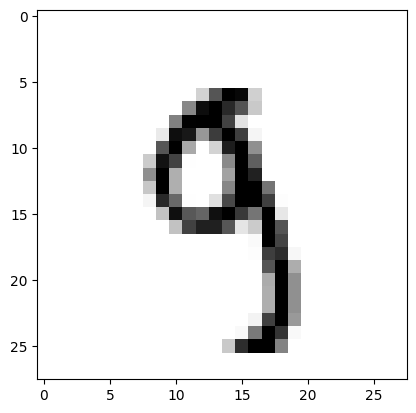

In [10]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


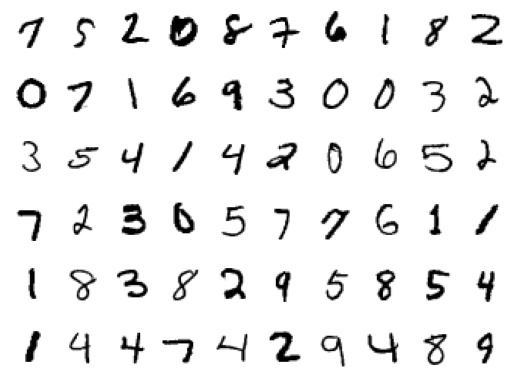

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [12]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [13]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [14]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.0148e-03, -1.0148e-03, -1.0148e-03,  ..., -1.0148e-03,
         -1.0148e-03, -1.0148e-03],
        [ 1.7136e-03,  1.7136e-03,  1.7136e-03,  ...,  1.7136e-03,
          1.7136e-03,  1.7136e-03],
        [ 4.3818e-03,  4.3818e-03,  4.3818e-03,  ...,  4.3818e-03,
          4.3818e-03,  4.3818e-03],
        ...,
        [-3.2668e-03, -3.2668e-03, -3.2668e-03,  ..., -3.2668e-03,
         -3.2668e-03, -3.2668e-03],
        [-2.0568e-03, -2.0568e-03, -2.0568e-03,  ..., -2.0568e-03,
         -2.0568e-03, -2.0568e-03],
        [-5.7338e-05, -5.7338e-05, -5.7338e-05,  ..., -5.7338e-05,
         -5.7338e-05, -5.7338e-05]])


In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

Epoch 0 - Training loss: 0.6529132774802667
Epoch 1 - Training loss: 0.2839129146601536
Epoch 2 - Training loss: 0.22317510304341057
Epoch 3 - Training loss: 0.18077331622327758
Epoch 4 - Training loss: 0.15034167563467266
Epoch 5 - Training loss: 0.1288006114048649
Epoch 6 - Training loss: 0.11317292356224203
Epoch 7 - Training loss: 0.0981227122356436
Epoch 8 - Training loss: 0.08864513613077114
Epoch 9 - Training loss: 0.08148674864862074
Epoch 10 - Training loss: 0.07440488817625002
Epoch 11 - Training loss: 0.06901453218972886
Epoch 12 - Training loss: 0.06272131530046741
Epoch 13 - Training loss: 0.05794835668469249
Epoch 14 - Training loss: 0.052869644447186115


In [17]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
# view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 0


In [18]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9741


In [19]:
torch.save(model, './my_mnist_model.pt') 
